# Importing necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The function below calculates the shape of output.

In [2]:
def calculate_shape(img, kernel, stride, padding):
    if (kernel > img):
        return -1
    elif (kernel == img):
        return img
    else:
         return int((img - kernel + 2*padding) / stride) + 1

## This function does the action of Max Pooling:

In [48]:
def MaxPooling2D(image, window, stride):
    channels = image.shape[2]
    out_width = int((image.shape[0] - window[0]) / stride) + 1
    out_height = int((image.shape[1] - window[1]) / stride) + 1 
    out = np.zeros(shape=(out_width, out_height, channels))
    for c in range(channels):
        out[:,:,c] = max_pool(image, window[0], out[:,:,c], stride)
    return out

In [49]:
def max_pool(image, window_size, output, stride):
    for i in range(0, image.shape[0], stride):
        for j in range(0, image.shape[1], stride):
            
            img_mat = image[i:i+window_size, j:j+window_size]
            
            if(img_mat.shape[0] >= window_size and img_mat.shape[1] >= window_size):
                index_i = int(i/stride)
                index_j = int(j/stride)
                output[index_i, index_j] = np.max(img_mat)
    return output

## The function below convolves an image with a filter:

In [3]:
def convolve(image, kernel, width, height, stride):
    output = np.zeros((width, height))
    kernel_size = kernel.shape[0]
    
    for i in range(0, image.shape[0], stride):
        for j in range(0, image.shape[1], stride):
            
            img_mat = image[i:i+kernel_size, j:j+kernel_size]
            
            if(img_mat.shape == kernel.shape):
                index_i = int(i/stride)
                index_j = int(j/stride)
                output[index_i, index_j] = np.sum(img_mat * kernel)
            
    return output

## This function adds zero padding to the image:

In [4]:
def padding_adder(image, x):
    for i in range(x):
        new = np.zeros((image.shape[0]+2, image.shape[1]+2))
        new[1:new.shape[0]-1, 1:new.shape[1]-1] = image
        image = new
    return image

## The function below calculates required zero padding so the shape of the output would be equal to original image:

In [5]:
def padding_size_calculator(image, kernel, stride):
    for p in range(0, image.shape[0]*3):
        if (calculate_shape(image.shape[0], kernel.shape[1], stride, p) == image.shape[0] and
           calculate_shape(image.shape[1], kernel.shape[1], stride, p) == image.shape[1]):
            return p

## This function plots each image alongside its convolutions:

In [43]:
def plot(image, conv, filters_size):
    plt.figure(figsize=(20,17))
    plt.subplot(1, filters_size+1, 1)
    plt.imshow(image)
    for i in range(0, filters_size):
        img = conv[i].reshape(conv[i].shape[0],conv[i].shape[1],1)
        img = np.array(img, np.int32)
        plt.subplot(1, filters_size+1, i+2)
        plt.imshow(img, cmap='gray')
    plt.show()

# The Main Function:

In [7]:
def Conv2D(image, filters, stride, padding):
    
    output = np.array([0])
    for Filter in range(filters.shape[0]):
        
        convolved_img = np.array([0])
        for channel in range(image.shape[2]):

            current_img = image[:,:,channel]
            p = 0
            if(padding == 'same'):
                p = padding_size_calculator(current_img, filters[Filter], stride)
            current_img = padding_adder(current_img, p)
            out_width = calculate_shape(current_img.shape[0], filters.shape[1], stride, 0)
            out_height = calculate_shape(current_img.shape[1], filters.shape[2], stride, 0)

            temp_output = convolve(current_img, filters[Filter],
                                   out_width, out_height, stride)             

            temp_output = temp_output.reshape(1,temp_output.shape[0],-1)
            convolved_img = temp_output if(channel == 0) else convolved_img + temp_output

        output = convolved_img / image.shape[2] if(Filter == 0) else np.concatenate((output,
                                                                                     convolved_img)
                                                                                    ,axis=0)
            
    return output

## Loading the images and defining the filters:

In [31]:
image1 = plt.imread('hinton.jpg')
image2 = plt.imread('bengio.jpg')

l1_filters = np.array([[[-1,-2,-1],
                        [0, 0, 0],
                        [1, 2, 1]],
                       [[1, 2, 1],
                        [0, 0, 0],
                        [-1,-2,-1]],
                       [[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]],
                       [[1/16, 2/16, 1/16],
                        [2/16, 4/16, 2/16],
                        [1/16, 2/16, 1/16]]])
l2_filters = np.array([[[1, 0],
                        [0, -1]],
                       [[0, +1],
                        [-1, 0]],
                       [[1/4, 1/4],
                        [1/4, 1/4]]])
l3_filters_1 = np.array([[[1,4,7,4,1],
                        [4,16,26,16,4],
                        [7,26,41,26,7],
                        [4,16,26,16,4],
                        [1,4,7,4,1]]]) / 273
l3_filters_2 = np.ones_like(l3_filters_1) / 25
l3_filters = np.concatenate((l3_filters_1, l3_filters_2))

# First Image:

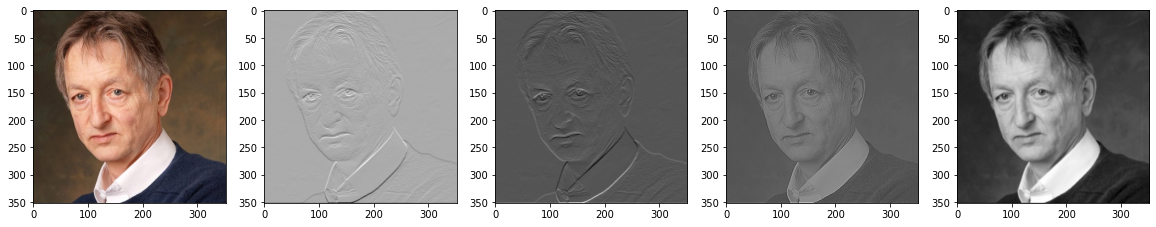

In [47]:
img1 = Conv2D(image1, l1_filters, 1, 'same')
plot(image1, img1, l1_filters.shape[0])

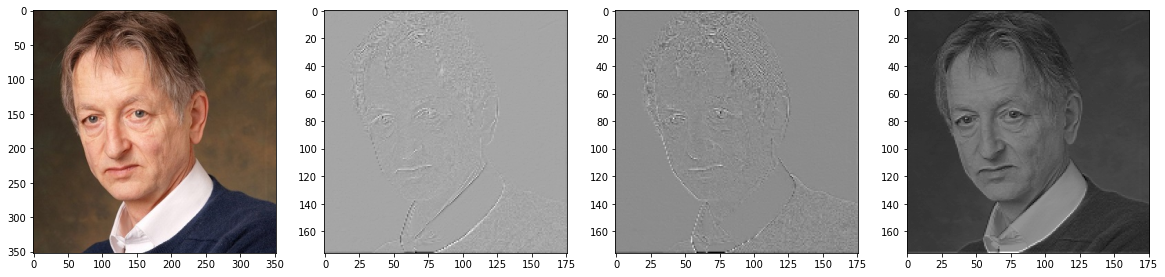

In [50]:
img1 = np.transpose(img1, (1,2,0))
img1 = Conv2D(img1, l2_filters, 2, 'valid')
plot(image1, img1, l2_filters.shape[0])

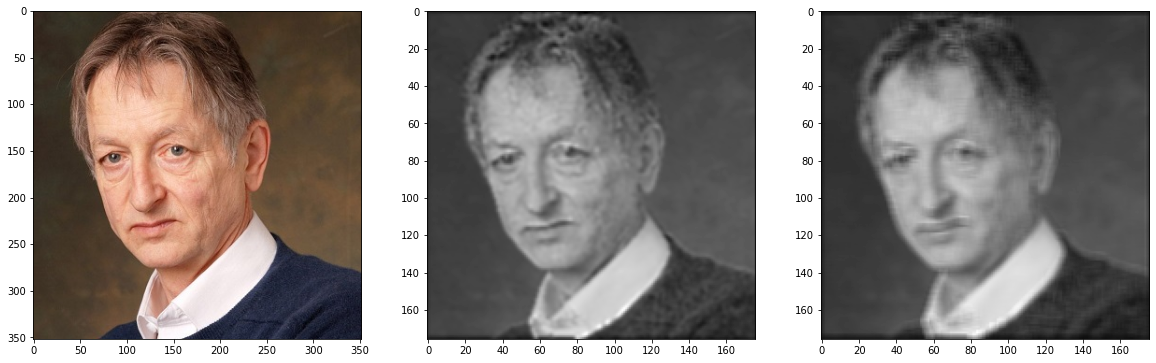

In [51]:
img1 = np.transpose(img1, (1,2,0))
img1 = Conv2D(img1, l3_filters, 1, 'same')
plot(image1, img1, l3_filters.shape[0])

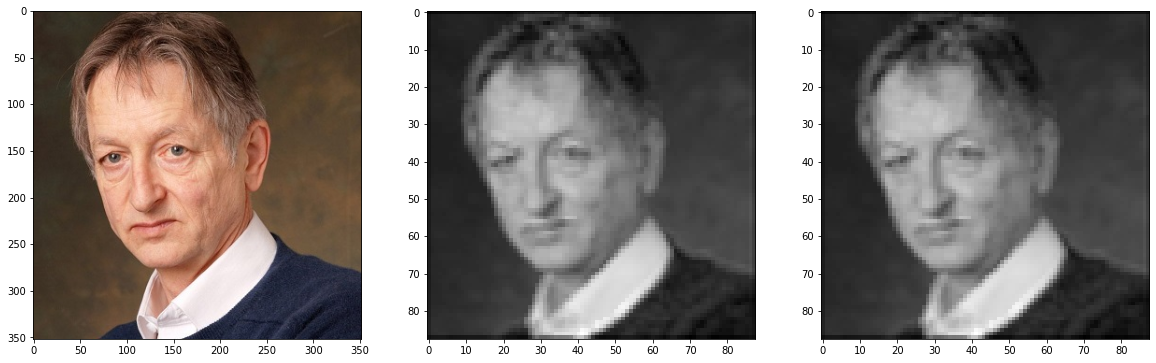

In [65]:
img1 = np.transpose(img1, (1,2,0))
img1 = MaxPooling2D(img1, window=(2, 2), stride=2)
img1 = np.transpose(img1, (2,0,1))
plot(image1, img1, l3_filters.shape[0])

# Last Image:

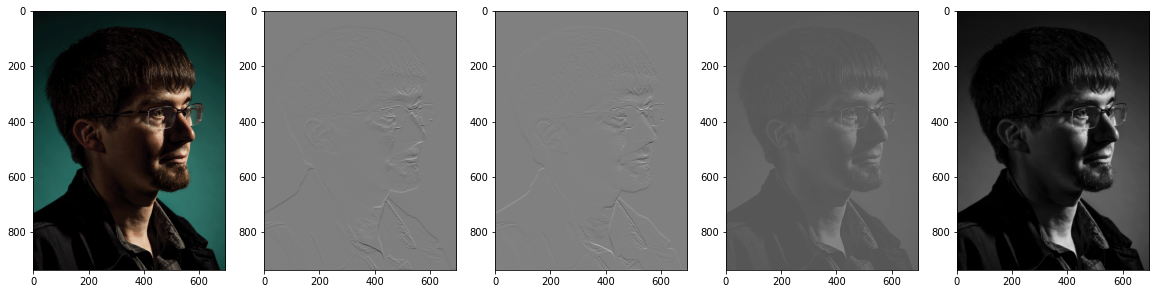

In [75]:
im4 = image4[:,:,:3]                 # The photo is RGBA (PNG format) -> we make it RGB
im4 = np.array(im4 * 255, np.int32)
img4 = Conv2D(im4, l1_filters, 1, 'same')
plot(image4, img4, l1_filters.shape[0])

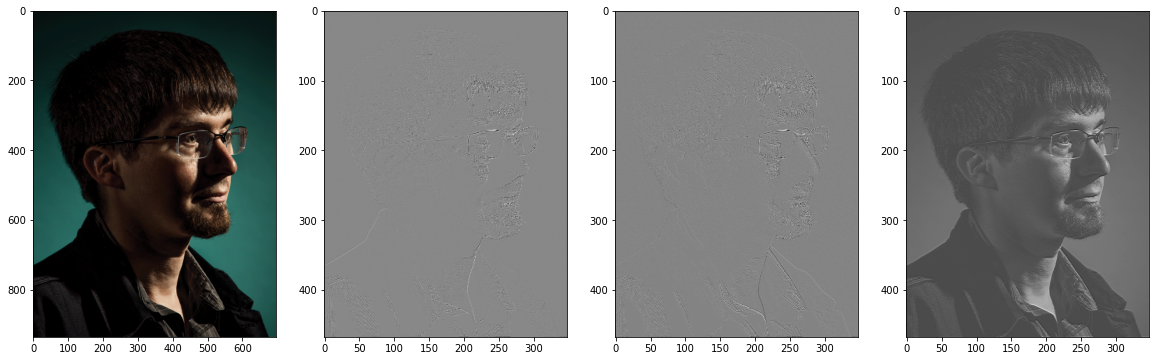

In [76]:
img4 = np.transpose(img4, (1,2,0))
img4 = Conv2D(img4, l2_filters, 2, 'valid')
plot(image4, img4, l2_filters.shape[0])

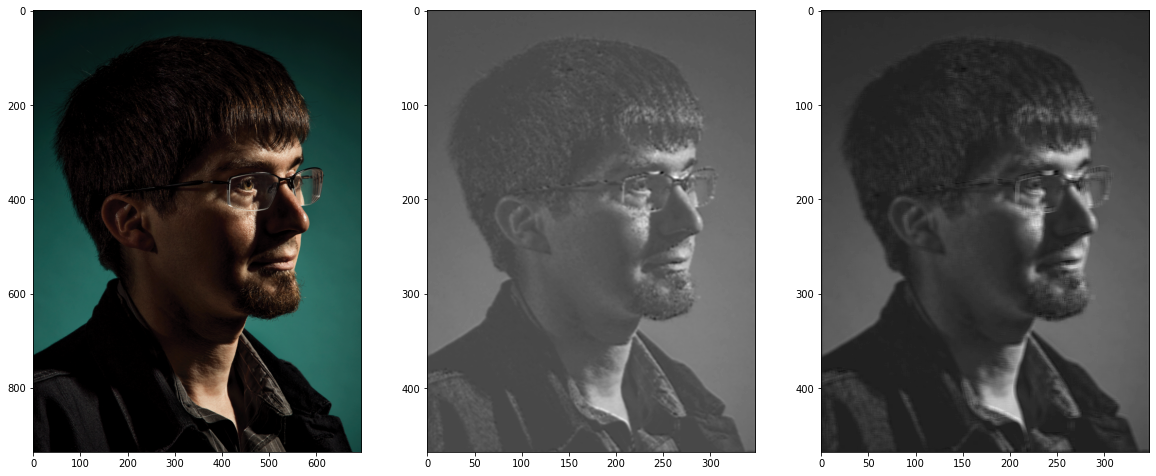

In [77]:
img4 = np.transpose(img4, (1,2,0))
img4 = Conv2D(img4, l3_filters, 1, 'same')
plot(image4, img4, l3_filters.shape[0])

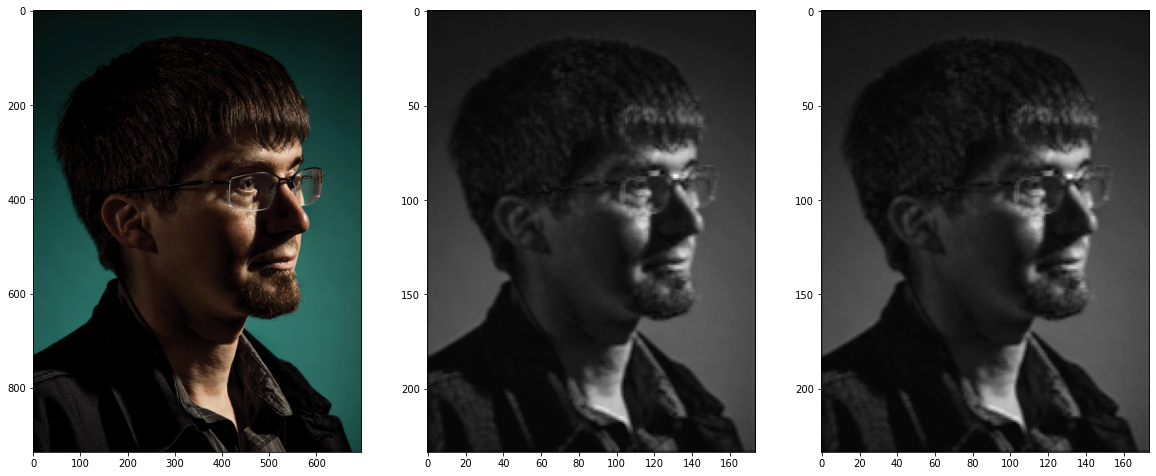

In [78]:
img4 = np.transpose(img4, (1,2,0))
img4 = MaxPooling2D(img4, window=(2, 2), stride=2)
img4 = np.transpose(img4, (2,0,1))
plot(image4, img4, l3_filters.shape[0])